In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

In [3]:
# Importing Poverty Data from American Community Survey 2018 5yr Estimates.
# ACS Data is estimated but is more up to date than the 10yr census from 2010
census_data = pd.read_csv("./ACS_5yr_2018_LA_County.csv", dtype={'id': np.unicode_ , "Estimate!!Percent below poverty level!!Population for whom poverty status is determined": np.single})
#dtype=pd.StringDtype()


In [4]:
census_data.head()

,id,Geographic Area Name,Estimate!!Total!!Population for whom poverty status is determined,Margin of Error!!Total MOE!!Population for whom poverty status is determined,Estimate!!Below poverty level!!Population for whom poverty status is determined,Margin of Error!!Below poverty level MOE!!Population for whom poverty status is determined,Estimate!!Percent below poverty level!!Population for whom poverty status is determined,Margin of Error!!Percent below poverty level MOE!!Population for whom poverty status is determined,Estimate!!Total!!Population for whom poverty status is determined!!AGE!!Under 18 years,Margin of Error!!Total MOE!!Population for whom poverty status is determined!!AGE!!Under 18 years,...,"Estimate!!Below poverty level!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Worked less than full-time, year-round in the past 12 months","Margin of Error!!Below poverty level MOE!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Worked less than full-time, year-round in the past 12 months","Estimate!!Percent below poverty level!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Worked less than full-time, year-round in the past 12 months","Margin of Error!!Percent below poverty level MOE!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Worked less than full-time, year-round in the past 12 months",Estimate!!Total!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Did not work,Margin of Error!!Total MOE!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Did not work,Estimate!!Below poverty level!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Did not work,Margin of Error!!Below poverty level MOE!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Did not work,Estimate!!Percent below poverty level!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Did not work,Margin of Error!!Percent below poverty level MOE!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Did not work
0,6037101110,"Census Tract 1011.10, Los Angeles County, Cali...",4207,478,679,281,16.1,6.4,849,187,...,85,61,44.7,25,300,95,178,74,59.3,14.4
1,6037101122,"Census Tract 1011.22, Los Angeles County, Cali...",3234,326,109,61,3.4,2,393,197,...,21,32,31.3,40.6,143,56,54,43,37.8,22.3
2,6037101210,"Census Tract 1012.10, Los Angeles County, Cali...",6042,510,1994,577,33.0,9,1369,317,...,110,85,40,27.1,514,202,375,186,73,16.6
3,6037101220,"Census Tract 1012.20, Los Angeles County, Cali...",3497,336,524,214,15.0,5.9,726,179,...,105,71,44.1,22.7,154,62,67,42,43.5,22.4
4,6037101300,"Census Tract 1013, Los Angeles County, California",4250,483,391,301,9.2,6.7,518,121,...,26,25,38.2,17.1,450,302,279,290,62,31.5


In [5]:
# Renaming ID Column
census_data = census_data.rename(columns= {'id': 'GEOID10'} , errors="raise")


In [6]:
# Confirming Data Type of Poverty Data
census_data["Estimate!!Percent below poverty level!!Population for whom poverty status is determined"].dtype

dtype('float32')

In [7]:
# Census Tract Shapefile has a "0" at the beginning of the GEOID10 numbers. Adding to allow for join.
census_data["GEOID10"] = "0"+ census_data["GEOID10"]
census_data.head()

,GEOID10,Geographic Area Name,Estimate!!Total!!Population for whom poverty status is determined,Margin of Error!!Total MOE!!Population for whom poverty status is determined,Estimate!!Below poverty level!!Population for whom poverty status is determined,Margin of Error!!Below poverty level MOE!!Population for whom poverty status is determined,Estimate!!Percent below poverty level!!Population for whom poverty status is determined,Margin of Error!!Percent below poverty level MOE!!Population for whom poverty status is determined,Estimate!!Total!!Population for whom poverty status is determined!!AGE!!Under 18 years,Margin of Error!!Total MOE!!Population for whom poverty status is determined!!AGE!!Under 18 years,...,"Estimate!!Below poverty level!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Worked less than full-time, year-round in the past 12 months","Margin of Error!!Below poverty level MOE!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Worked less than full-time, year-round in the past 12 months","Estimate!!Percent below poverty level!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Worked less than full-time, year-round in the past 12 months","Margin of Error!!Percent below poverty level MOE!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Worked less than full-time, year-round in the past 12 months",Estimate!!Total!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Did not work,Margin of Error!!Total MOE!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Did not work,Estimate!!Below poverty level!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Did not work,Margin of Error!!Below poverty level MOE!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Did not work,Estimate!!Percent below poverty level!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Did not work,Margin of Error!!Percent below poverty level MOE!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Did not work
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",4207,478,679,281,16.1,6.4,849,187,...,85,61,44.7,25,300,95,178,74,59.3,14.4
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",3234,326,109,61,3.4,2,393,197,...,21,32,31.3,40.6,143,56,54,43,37.8,22.3
2,06037101210,"Census Tract 1012.10, Los Angeles County, Cali...",6042,510,1994,577,33.0,9,1369,317,...,110,85,40,27.1,514,202,375,186,73,16.6
3,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",3497,336,524,214,15.0,5.9,726,179,...,105,71,44.1,22.7,154,62,67,42,43.5,22.4
4,06037101300,"Census Tract 1013, Los Angeles County, California",4250,483,391,301,9.2,6.7,518,121,...,26,25,38.2,17.1,450,302,279,290,62,31.5


In [8]:
# Loading Census Tract Data
census_tracts = gpd.read_file("./GISData/CENSUS_TRACTS_2010/CENSUS_TRACTS_2010.shp")
# Confirming Projection of data. (NAD83 / California zone 5 (ftUS))
census_tracts.crs

{'init': 'epsg:2229'}

In [9]:
# Reprojecting to Web Mercatur for webmapping
census_tracts = census_tracts.to_crs({'init': 'epsg:3857'})
census_tracts.crs

{'init': 'epsg:3857'}

In [10]:
# Data type is a Pandas String
census_tracts["GEOID10"].dtype

dtype('O')

In [11]:
# Merging Tract Outlines with Census Data
census_tracts_populated = census_tracts.merge(census_data, on='GEOID10')


In [12]:
for col in census_tracts_populated.columns: 
    print(col)

GEOID10
CT10
LABEL
X_Center
Y_Center
Shape_STAr
Shape_STLe
geometry
Geographic Area Name
Estimate!!Total!!Population for whom poverty status is determined
Margin of Error!!Total MOE!!Population for whom poverty status is determined
Estimate!!Below poverty level!!Population for whom poverty status is determined
Margin of Error!!Below poverty level MOE!!Population for whom poverty status is determined
Estimate!!Percent below poverty level!!Population for whom poverty status is determined
Margin of Error!!Percent below poverty level MOE!!Population for whom poverty status is determined
Estimate!!Total!!Population for whom poverty status is determined!!AGE!!Under 18 years
Margin of Error!!Total MOE!!Population for whom poverty status is determined!!AGE!!Under 18 years
Estimate!!Below poverty level!!Population for whom poverty status is determined!!AGE!!Under 18 years
Margin of Error!!Below poverty level MOE!!Population for whom poverty status is determined!!AGE!!Under 18 years
Estimate!!Pe

In [13]:
# Mapping Percent Below Poverty Line by Census Tract for LA County
ax = census_tracts_populated.plot(figsize=(15, 15),column='Estimate!!Percent below poverty level!!Population for whom poverty status is determined', cmap="Reds", legend = True)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [15]:
# Importing LA Neighborhood Outlines and Reprojecting to Web Mercatur
neighborhoods = gpd.read_file("./GISData/Neighborhood_Councils_Certified/Neighborhood_Councils_Certified.shp")
neighborhoods = neighborhoods.to_crs({'init': 'epsg:3857'})

In [16]:
# Capturing Extent Of Neighborhood Boundaries
neighborhood_extent = neighborhoods["geometry"].total_bounds
print(neighborhood_extent)

[-13210082.22305533   3989205.51249965 -13152995.62402736
   4074185.1106827 ]


In [17]:
# Limiting Census Tracts to those that intersect with the neighborhood extent.
census_tracts_populated = census_tracts_populated.cx[neighborhood_extent[0]:neighborhood_extent[1], neighborhood_extent[2]:neighborhood_extent[3]]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


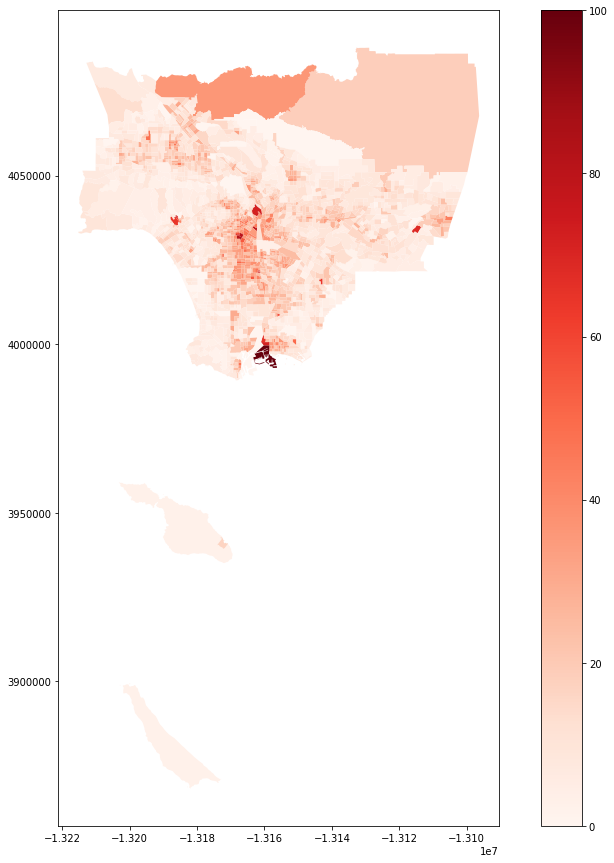

In [18]:
# Focused Map of poverty levels.
ax = census_tracts_populated.plot(figsize=(15, 15),column='Estimate!!Percent below poverty level!!Population for whom poverty status is determined', cmap="Reds", legend = True)


## In order to estimate the number of people below the poverty level in each neighborhood, we will go through several steps.

1. Calculate the area of each census tract
2. Perform a Union process on the Census Tracts and Neighborhoods
   - This will produce new polygons along any division from either dataset
3. Calculate the area of each new polygon
4. Calculate the percentage of the original census tract covered by each new polygon
5. Multiply the poverty total for the census tract by the percentage of the new polygon to get an estimate of the number of people in poverty in that area.
6. Sum the poverty totals for each polygon based on the Neighborhood the polygon falls within.
7. Join the poverty estimates to the Neighborhood polygons.

In [19]:
# Add Original Area as attribute of census tracts
census_tracts_populated["Census_Tract_Area"] = census_tracts_populated["geometry"].area

In [20]:
# Use Overlay to divide Census Tracts along Neighborhood Boundaries
intermediate_polygons = gpd.overlay(census_tracts_populated, neighborhoods, how = 'union')
intermediate_polygons.head()

,GEOID10,CT10,LABEL,X_Center,Y_Center,Shape_STAr,Shape_STLe,Geographic Area Name,Estimate!!Total!!Population for whom poverty status is determined,Margin of Error!!Total MOE!!Population for whom poverty status is determined,...,WADDRESS,DWEBSITE,DEMAIL,DPHONE,NC_ID,CERTIFIED,TOOLTIP,NLA_URL,SERVICE_RE,geometry
0,06037297602,297602,2976.02,6473372.0,1719119.0,6.697031e+06,12308.315385,"Census Tract 2976.02, Los Angeles County, Cali...",3739.0,426.0,...,http://www.cspnc.org/,http://empowerla.org/CSPNC,CSPNC@EmpowerLA.org,213-978-1551,96.0,2001-12-11T00:00:00.000Z,COASTAL SAN PEDRO NC,navigatela/reports/nc_reports.cfm?id=96,REGION 12 - HARBOR,"POLYGON ((-13167757.701 3991612.251, -13167757..."
1,06037297601,297601,2976.01,6474243.0,1718161.0,7.986145e+06,20183.843371,"Census Tract 2976.01, Los Angeles County, Cali...",2706.0,217.0,...,http://www.cspnc.org/,http://empowerla.org/CSPNC,CSPNC@EmpowerLA.org,213-978-1551,96.0,2001-12-11T00:00:00.000Z,COASTAL SAN PEDRO NC,navigatela/reports/nc_reports.cfm?id=96,REGION 12 - HARBOR,"MULTIPOLYGON (((-13166591.855 3989621.964, -13..."
2,06037670602,670602,6706.02,6449990.0,1729526.0,1.527385e+08,101823.774732,"Census Tract 6706.02, Los Angeles County, Cali...",6707.0,484.0,...,http://www.cspnc.org/,http://empowerla.org/CSPNC,CSPNC@EmpowerLA.org,213-978-1551,96.0,2001-12-11T00:00:00.000Z,COASTAL SAN PEDRO NC,navigatela/reports/nc_reports.cfm?id=96,REGION 12 - HARBOR,"POLYGON ((-13172396.322 3992269.622, -13172394..."
3,06037297202,297202,2972.02,6470739.0,1722342.0,6.198689e+06,9987.203954,"Census Tract 2972.02, Los Angeles County, Cali...",3921.0,355.0,...,http://www.cspnc.org/,http://empowerla.org/CSPNC,CSPNC@EmpowerLA.org,213-978-1551,96.0,2001-12-11T00:00:00.000Z,COASTAL SAN PEDRO NC,navigatela/reports/nc_reports.cfm?id=96,REGION 12 - HARBOR,"POLYGON ((-13168492.963 3992263.211, -13168493..."
4,06037297201,297201,2972.01,6473048.0,1722396.0,4.348887e+06,8280.532166,"Census Tract 2972.01, Los Angeles County, Cali...",4246.0,481.0,...,http://www.cspnc.org/,http://empowerla.org/CSPNC,CSPNC@EmpowerLA.org,213-978-1551,96.0,2001-12-11T00:00:00.000Z,COASTAL SAN PEDRO NC,navigatela/reports/nc_reports.cfm?id=96,REGION 12 - HARBOR,"POLYGON ((-13167755.140 3992320.153, -13167755..."


In [21]:
# Check to confirm Census Tracts outside the Neighborhood Area
# Are Null for the NC_ID column
intermediate_polygons["NC_ID"].isnull().values.any()

True

In [22]:
# Calculate area of new polygons
intermediate_polygons["Intermediate_Area"] = intermediate_polygons["geometry"].area

In [23]:
# Calculate % of original area and multiply attributes by that
intermediate_polygons["Percent_Of_Original"] = intermediate_polygons["Intermediate_Area"] / intermediate_polygons ["Census_Tract_Area"]

In [24]:
#Estimate population who have a poverty status by multiplying census tract total by the percentage of the 
#census tract the polygon occupies.
intermediate_polygons["Estimate!!Total!!Population for whom poverty status is determined"] = intermediate_polygons["Estimate!!Total!!Population for whom poverty status is determined"]* intermediate_polygons["Percent_Of_Original"]


In [25]:
#Estimate population in poverty by multiplying census tract total by the percentage of the 
#census tract the polygon occupies.
intermediate_polygons["Estimate!!Below poverty level!!Population for whom poverty status is determined"] = intermediate_polygons["Estimate!!Below poverty level!!Population for whom poverty status is determined"]* intermediate_polygons["Percent_Of_Original"]


In [26]:
#intermediate_polygons.to_file("intermediate_polygons.geojson", driver = 'GeoJSON')
# countries_gdf.to_file("countries.geojson", driver='GeoJSON')

## Used file output to confirm that only polygons within City Limits have a NC ID populated
![Checking Output in QGIS](confirmingAdjacentPolygons.png)

In [27]:
# Use Neighborhood Council ID to condense data by neighborhood and calculate sum
intermediate_df = pd.DataFrame(intermediate_polygons)
pop_by_nc = intermediate_df["Estimate!!Total!!Population for whom poverty status is determined"].groupby(intermediate_df["NC_ID"]).sum()
poverty_by_nc = intermediate_df["Estimate!!Below poverty level!!Population for whom poverty status is determined"].groupby(intermediate_df["NC_ID"]).sum()

In [28]:
# Join Population data to NC GDF
neighborhoods = neighborhoods.join(pop_by_nc, on = "NC_ID", how = "left", rsuffix="rt")

In [29]:
# Join data to neighborhoods by ID
neighborhoods = neighborhoods.join(poverty_by_nc, on = "NC_ID", how = "left", rsuffix="rt")

In [30]:
for col in neighborhoods.columns:
    print(col)

OBJECTID
NAME
WADDRESS
DWEBSITE
DEMAIL
DPHONE
NC_ID
CERTIFIED
TOOLTIP
NLA_URL
SERVICE_RE
geometry
Estimate!!Total!!Population for whom poverty status is determined
Estimate!!Below poverty level!!Population for whom poverty status is determined


In [31]:
# Calculating percent below poverty level for each neighborhood based on the summed totals
neighborhoods["Percent_Below_Poverty"] = neighborhoods["Estimate!!Below poverty level!!Population for whom poverty status is determined"] / neighborhoods["Estimate!!Total!!Population for whom poverty status is determined"]

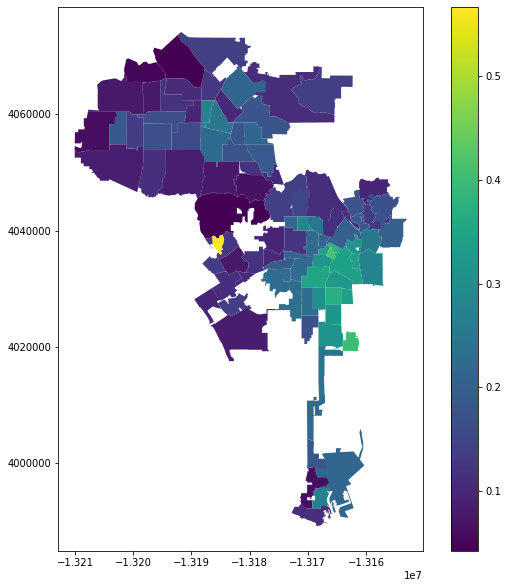

In [32]:
ax = neighborhoods.plot(figsize=(10, 10), column='Percent_Below_Poverty', legend=True)


In [33]:
# What is the neighborhood on the West Side with over a 50% poverty rate?
neighborhoods["Percent_Below_Poverty"].sort_values()

73    0.042645
76    0.044097
45    0.050542
41    0.060239
23    0.061718
        ...   
92    0.370779
63    0.379477
37    0.401790
64    0.415625
98    0.566227
Name: Percent_Below_Poverty, Length: 99, dtype: float64

In [34]:
# Index 98 Is North Westwood NC 
# Why the high poverty level?
neighborhoods.iloc[98]

OBJECTID                                                                                                                         105
NAME                                                                                                               NORTH WESTWOOD NC
WADDRESS                                                                                                https://empowerla.org/nwwnc/
DWEBSITE                                                                                                https://empowerla.org/nwwnc/
DEMAIL                                                                                                           NWWNC@EmpowerLA.org
DPHONE                                                                                                                  213-978-1551
NC_ID                                                                                                                            127
CERTIFIED                                                            

### North Westwood NC covers most of the UCLA Campus
### Student housing is likely the reason for the numbers
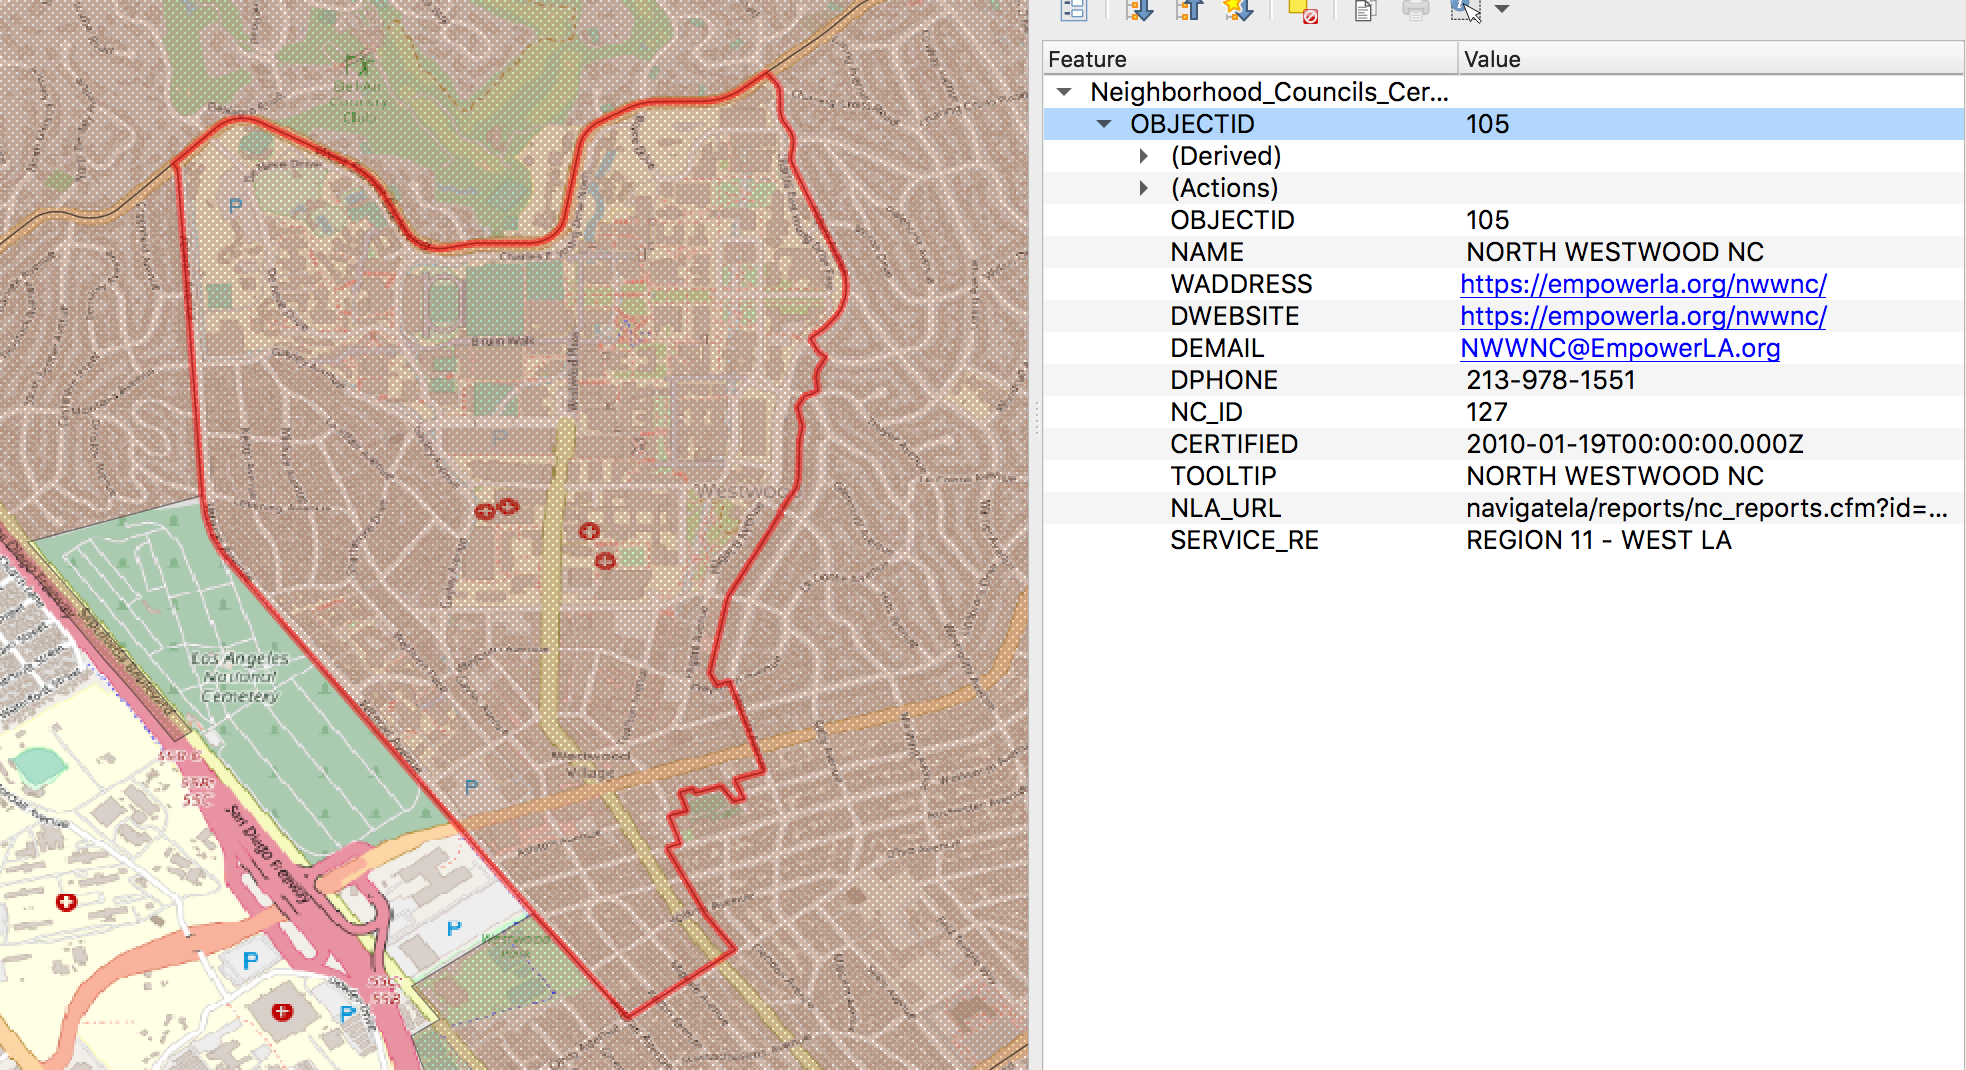


In [35]:
# Exporting to GeoJSON for usage in other analysis.
neighborhoods.to_file("neighborhoods_with_poverty.geojson", driver = 'GeoJSON')

In [36]:
neighborhood_df = pd.DataFrame(neighborhoods)

In [37]:
neighborhood_df = neighborhood_df.drop(['geometry'], axis=1)

In [38]:
# Exporting to csv
neighborhood_df.to_csv("./neighborhoods_with_poverty.csv")